# FIFA Player Prediction of 2019 by Using Different Regression

In [286]:
# import the libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [287]:
#Read the dataset
dataset = pd.read_csv('data.csv')
dataset

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [293]:
# check the shape of the dataset
dataset.shape

(18207, 89)

In [294]:
# # Summary of numerical variables for  data set
dataset.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [295]:
#Info of the Dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

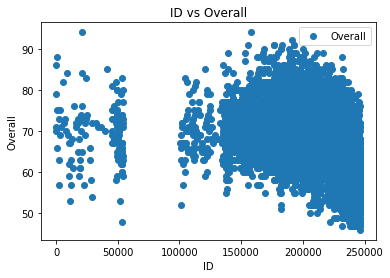

In [296]:
#plot the graph
dataset.plot(x='ID', y='Overall', style='o')  
plt.title('ID vs Overall')  
plt.xlabel('ID')  
plt.ylabel('Overall')  
plt.show()

In [297]:
# Store total number of observation in  dataset
dataset_length =len(dataset)
dataset_length

18207

In [298]:
dataset.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [299]:
# Get the unique values and their frequency of variable Overall

dataset['Overall'].value_counts()


66    1163
67    1118
64    1091
65    1045
68    1035
63    1002
69     973
70     889
62     878
71     783
72     753
61     711
60     649
73     608
74     537
59     525
75     497
58     444
57     402
76     373
56     343
77     304
55     265
54     250
53     199
79     171
78     168
52     159
80     143
51     125
50     103
82      94
81      93
83      70
84      45
49      36
85      33
48      32
86      22
47      20
88      17
87      13
89      11
91       6
90       5
94       2
92       1
46       1
Name: Overall, dtype: int64

In [300]:
dataset.fillna(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


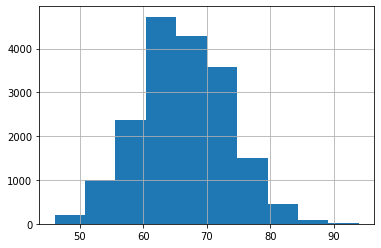

In [301]:
%matplotlib inline

# Histogram of variable Overall

dataset['Overall'].hist()


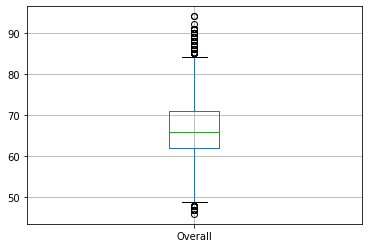

In [302]:
# Box Plot for variable Overall of  data set

dataset.boxplot(column='Overall')

In [303]:
X = dataset['ID'].values.reshape(-1,1)
X.shape

(18207, 1)

In [304]:
#Imputing Missing values with mean for continuous variable
fullData = pd.concat([dataset], axis=0)
fullData.isnull().sum()
fullData['StandingTackle']=fullData['StandingTackle'].fillna(fullData['StandingTackle'].mean(), inplace=True)



# Simple Linear Regression

In [305]:
X = dataset[['ID']].values.reshape(-1,1)
y = dataset['Overall'].values.reshape(-1,1)
y.shape

(18207, 1)

In [306]:
#Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [307]:
y_train

array([[71],
       [75],
       [64],
       ...,
       [66],
       [65],
       [73]], dtype=int64)

In [308]:
X_test

array([[228381],
       [223146],
       [208771],
       ...,
       [197496],
       [219595],
       [238670]], dtype=int64)

# Linear Regression

In [309]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [310]:
prediction_linear=lin_regressor.predict(X_test)
prediction_linear

array([[64.91490523],
       [65.41844579],
       [66.80113834],
       ...,
       [67.88565023],
       [65.76000692],
       [63.92523402]])

In [311]:
acc_LR=lin_regressor.score(X_test,y_test)
print(acc_LR)

0.16684941406840814


# Lasso Regression

In [312]:
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [313]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_lasso

array([64.91492081, 65.4184557 , 66.80113269, ..., 67.88563238,
       65.76001299, 63.92526074])

In [314]:
acc_LR=lasso_regressor.score(X_test,y_test)
print(acc_LR)

0.16684941663607822


# Ridge Regression

In [315]:
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()
ridge_regressor.fit(X_train,y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [316]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([[64.91490523],
       [65.41844579],
       [66.80113834],
       ...,
       [67.88565023],
       [65.76000692],
       [63.92523402]])

# Elastic Net Regression

In [317]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet()
model_enet.fit(X_train, y_train) 


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [318]:
prediction_elasticnet= model_enet.predict(X_test)
prediction_elasticnet

array([64.91491302, 65.41845075, 66.80113551, ..., 67.88564131,
       65.76000995, 63.92524738])

In [319]:
print("Linear")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_linear]})
df

Linear


,Actual,Predicted
0,"[[58], [62], [62], [67], [58], [65], [58], [66...","[[64.91490523023423], [65.41844578626298], [66..."


In [320]:
print("Lasso")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_lasso]})
df

Lasso


,Actual,Predicted
0,"[[58], [62], [62], [67], [58], [65], [58], [66...","[64.9149208143945, 65.41845570372314, 66.80113..."


In [321]:
print("Rigde")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_ridge]})
df

Rigde


,Actual,Predicted
0,"[[58], [62], [62], [67], [58], [65], [58], [66...","[[64.91490523023437], [65.41844578626308], [66..."


In [322]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_elasticnet))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_elasticnet))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_elasticnet)))

Mean Absolute Error: 4.922592160468324
Mean Squared Error: 39.523141125370856
Root Mean Squared Error: 6.286743284513124


In [323]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))

Mean Absolute Error: 4.92259173102811
Mean Squared Error: 39.52314118653119
Root Mean Squared Error: 6.286743289377354


In [324]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

Mean Absolute Error: 4.922592589825942
Mean Squared Error: 39.523141064725614
Root Mean Squared Error: 6.28674327968986


ValueError: could not broadcast input array from shape (7283,1) into shape (7283)

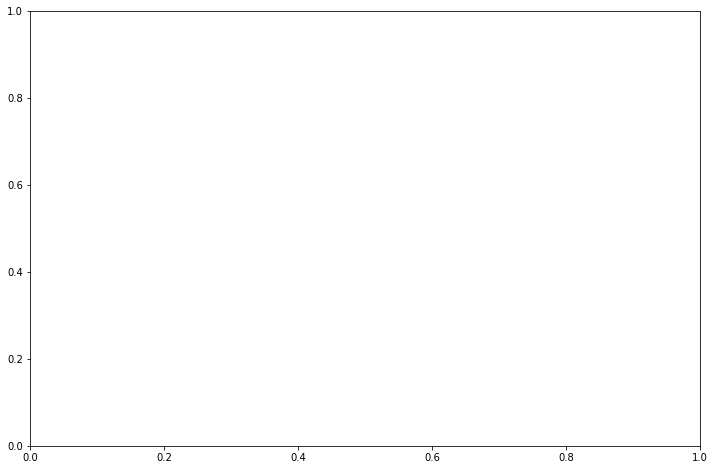

# Multiple Linear Regression

In [327]:
X = dataset[['Age','Potential']]
y = dataset['Overall']
y.shape

(18207,)

In [328]:
dataset.fillna(0)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [330]:
X_train

,Age,Potential
4104,37,71
1832,20,84
11673,19,75
9652,24,73
11982,32,64
...,...,...
9225,24,70
13123,26,65
9845,23,75
10799,21,77


In [331]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [332]:
prediction_linear=lin_regressor.predict(X_test)
prediction_linear

array([57.2907763 , 61.01785914, 59.25279218, ..., 71.85818369,
       65.67671268, 58.27178424])

In [333]:
acc_LR=lin_regressor.score(X_test,y_test)
print(acc_LR)

0.84712477524638


In [334]:
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [335]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_lasso

array([57.71290683, 61.28930333, 59.55903   , ..., 71.47194322,
       65.75979896, 58.63596841])

In [336]:
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()
ridge_regressor.fit(X_train,y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [337]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([57.29081326, 61.01788308, 59.25281882, ..., 71.85814895,
       65.67672035, 58.27181604])

In [338]:
print("Linear")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_linear]})
df

Linear


,Actual,Predicted
0,15885 58 13652 62 13522 62 7814 6...,"[57.29077629962798, 61.01785913666383, 59.2527..."


In [339]:
print("Lasso")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_lasso]})
df

Lasso


,Actual,Predicted
0,15885 58 13652 62 13522 62 7814 6...,"[57.71290682815548, 61.28930332898662, 59.5590..."


In [340]:
print("Rigde")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_ridge]})
df

Rigde


,Actual,Predicted
0,15885 58 13652 62 13522 62 7814 6...,"[57.29081326287887, 61.017883080587396, 59.252..."


In [341]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_elasticnet))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction_elasticnet))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_elasticnet)))

Mean Absolute Error: 4.922592160468324
Mean Squared Error: 39.523141125370856
Root Mean Squared Error: 6.286743284513124


Text(0, 0.5, 'Mean Absolute Error')

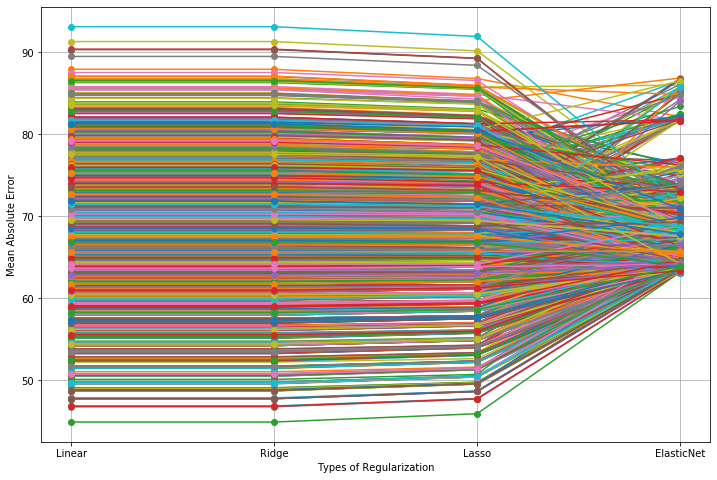

In [344]:
plt.figure(figsize=(12,8))
plt.plot(["Linear","Ridge","Lasso","ElasticNet"],[prediction_linear,prediction_ridge,prediction_lasso,prediction_elasticnet],marker='o')
plt.grid()
plt.xlabel("Types of Regularization")
plt.ylabel("Mean Absolute Error")

# Logistic Regression

In [342]:
from sklearn.linear_model import LogisticRegression
log_regressor=LogisticRegression()
log_regressor.fit(X_train,y_train)

C:\Users\Neha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [343]:
prediction_log=log_regressor.predict(X_test)
prediction_log

array([66, 66, 66, ..., 66, 66, 66], dtype=int64)

In [278]:
print("Logistic")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_log]})
df

Logistic


,Actual,Predicted
0,15885 58 13652 62 13522 62 7814 6...,"[66, 66, 66, 66, 64, 66, 66, 66, 66, 66, 60, 6..."


In [279]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,prediction_log))
print(classification_report(y_test,prediction_log))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Neha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          46       0.00      0.00      0.00         1
          47       0.00      0.00      0.00        11
          48       0.00      0.00      0.00        15
          49       0.00      0.00      0.00        18
          50       0.00      0.00      0.00        35
          51       0.00      0.00      0.00        46
          52       0.00      0.00      0.00        58
          53       0.00      0.00      0.00        78
          54       0.00      0.00      0.00       109
          55       0.00      0.00      0.00       104
          56       0.00      0.00      0.00       130
          57       0.00      0.00      0.00       163
          58       0.00      0.00      0.00       179
          59       0.00      0.00      0.00       226
          60       0.05      0.17      0.08       281
          61       0.00      0.00      0.00       295
          62       0.00      0.00      0.00       346
          63       0.00    

In [280]:
acc_LR=log_regressor.score(X_test,y_test)
print(acc_LR)

0.06219964300425649


In [281]:
# import the libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [282]:
#Read the dataset
dataset = pd.read_csv('data.csv')
dataset

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [283]:
dataset.fillna(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


array([66, 66, 66, ..., 66, 66, 66], dtype=int64)

0.06165041878346835
